In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

path = kagglehub.dataset_download("oddrationale/mnist-in-csv")
print(os.listdir(path))

['mnist_test.csv', 'mnist_train.csv']


In [2]:
df_train = pd.read_csv(os.path.join(path, 'mnist_train.csv'))
print(df_train.shape)

(60000, 785)


In [3]:
data = np.array(df_train)
np.random.shuffle(data)
m,n = data.shape

dev = data[0:1000].T
Y_dev = dev[0]
X_dev = dev[1:]
X_dev = X_dev/255

test = data[1000:2000].T
Y_test = test[0]
X_test = test[1:]
X_test = X_test/255

train = data[2000:].T
Y_train = train[0]
X_train = train[1:]
X_train = X_train/255


print(Y_dev.shape,X_dev.shape)
print(Y_test.shape,X_test.shape)
print(Y_train.shape,X_train.shape)

(1000,) (784, 1000)
(1000,) (784, 1000)
(58000,) (784, 58000)


In [4]:
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size,Y.max()+1))
  one_hot_Y[np.arange(Y.size),Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

In [5]:
#functions
def parameters_init():
  W1 = np.random.rand(30,784)*0.009
  B1 = np.zeros((30,1))
  W2 = np.random.rand(20,30)*0.009
  B2 = np.zeros((20,1))
  W3 = np.random.rand(10,20)*0.009
  B3 = np.zeros((10,1))
  return W1,B1,W2,B2,W3,B3

def ReLU(Z):
  return np.maximum(Z,0)

def ReLU_prime(Z):
  return Z>0

def softmax(Z):
  A = np.exp(Z)/sum(np.exp(Z))
  return A

In [6]:
#implementation
def forward_pass(A0,W1,B1,W2,B2,W3,B3):
  Z1 = W1.dot(A0)+B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1)+B2
  A2 = ReLU(Z2)
  Z3 = W3.dot(A2)+B3
  A3 = softmax(Z3)
  return Z1,A1,Z2,A2,Z3,A3

def backward_pass(A3,W3,A2,Z2,W2,A1,Z1,A0,Y):
  one_hot_Y = one_hot(Y)
  dZ3 = A3 - one_hot_Y
  dW3 = 1/m*(np.dot(dZ3,A2.T))
  dB3 = 1/m*np.sum(dZ3, axis=1, keepdims=True)

  dZ2 = np.dot(W3.T,dZ3)*ReLU_prime(Z2)
  dW2 = 1/m*(np.dot(dZ2,A1.T))
  dB2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)

  dZ1 = np.dot(W2.T,dZ2)*ReLU_prime(Z1)
  dW1 = 1/m*(np.dot(dZ1,A0.T))
  dB1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)

  return dW1,dB1,dW2,dB2,dW3,dB3

def update_parameters(W1,B1,W2,B2,W3,B3,dW1,dB1,dW2,dB2,dW3,dB3,alpha):
  W1 -= alpha*dW1
  B1 -= alpha*dB1
  W2 -= alpha*dW2
  B2 -= alpha*dB2
  W3 -= alpha*dW3
  B3 -= alpha*dB3
  return W1,B1,W2,B2,W3,B3



In [7]:
def get_predictions(A3):
  return np.argmax(A3, 0)

def compute_cost(Y_hat, Y):
    if Y.ndim == 1:
        one_hot_Y = np.zeros_like(Y_hat)
        one_hot_Y[Y, np.arange(Y.size)] = 1
        Y = one_hot_Y
    m = Y.shape[1]
    return -np.sum(Y * np.log(Y_hat + 1e-8)) / m

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size


In [8]:
cost_list=[]
accuracy_list=[]

In [9]:
def grad_descent(epoch,alpha,X,Y):
  W1,B1,W2,B2,W3,B3 = parameters_init()
  for i in range(epoch+1):
    Z1,A1,Z2,A2,Z3,A3 = forward_pass(X,W1,B1,W2,B2,W3,B3)
    dW1,dB1,dW2,dB2,dW3,dB3 = backward_pass(A3,W3,A2,Z2,W2,A1,Z1,X,Y)
    W1,B1,W2,B2,W3,B3 = update_parameters(W1,B1,W2,B2,W3,B3,dW1,dB1,dW2,dB2,dW3,dB3,alpha)
    if i % 10 == 0:
      print("Iteration: ", i)
      cost = compute_cost(A3,Y)
      print("cost: ",cost)
      cost_list.append(cost)
      predictions = get_predictions(A3)
      print("accuracy: ")
      acc = get_accuracy(predictions, Y)
      print(acc)
      accuracy_list.append(acc)
  return W1,B1,W2,B2,W3,B3

In [10]:
W1, B1, W2, B2, W3, B3 = grad_descent(1200, 0.21,X_train, Y_train)


Iteration:  0
cost:  2.302580372281363
accuracy: 
0.09813793103448276
Iteration:  10
cost:  2.3016113172944985
accuracy: 
0.11324137931034482
Iteration:  20
cost:  2.3006155147224785
accuracy: 
0.11474137931034482
Iteration:  30
cost:  2.2992818141443863
accuracy: 
0.13541379310344828
Iteration:  40
cost:  2.297058406753324
accuracy: 
0.18763793103448276
Iteration:  50
cost:  2.2927839863373323
accuracy: 
0.2016206896551724
Iteration:  60
cost:  2.2838742262679133
accuracy: 
0.1815
Iteration:  70
cost:  2.2648583548969117
accuracy: 
0.1745
Iteration:  80
cost:  2.2235320695321708
accuracy: 
0.1974655172413793
Iteration:  90
cost:  2.1615958453629465
accuracy: 
0.20791379310344826
Iteration:  100
cost:  2.095451665793277
accuracy: 
0.21587931034482757
Iteration:  110
cost:  2.035277596434011
accuracy: 
0.2229655172413793
Iteration:  120
cost:  1.986016489194295
accuracy: 
0.2282241379310345
Iteration:  130
cost:  1.9473541880077592
accuracy: 
0.2331551724137931
Iteration:  140
cost:  1.

In [11]:
Z1,A1,Z2,A2,Z3,A3 = forward_pass(X_dev,W1,B1,W2,B2,W3,B3)
predictions = get_predictions(A3)
print("accuracy on dev: ")
print(get_accuracy(predictions, Y_dev))

accuracy on dev: 
0.925


In [12]:
Z1,A1,Z2,A2,Z3,A3 = forward_pass(X_test,W1,B1,W2,B2,W3,B3)
predictions = get_predictions(A3)
print("accuracy on test: ")
print(get_accuracy(predictions, Y_test))

accuracy on test: 
0.93


In [13]:
def plot_metrics(cost_list, accuracy_list):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot cost on left Y-axis
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Cost', color='red')
    ax1.plot(cost_list, color='red', label='Cost')
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.grid(False)

    # Accuracy on right Y-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('Accuracy', color='green')
    ax2.plot(accuracy_list, color='green', label='Accuracy')
    ax2.tick_params(axis='y', labelcolor='green')

    # Set clean ticks for accuracy from 0.0 to 1.0 in steps of 0.1
    ax2.set_yticks(np.arange(0.0, 1.05, 0.1))

    # Title and layout
    plt.title('Cost and Accuracy vs Epochs')
    fig.tight_layout()
    plt.show()


In [14]:
def show_predictions(X, Y, W1, B1, W2, B2, W3, B3, num=5):
    indices = np.random.choice(X.shape[1], num, replace=False)

    for i, idx in enumerate(indices):
        x = X[:, idx].reshape(-1, 1)
        y_true = Y[idx]

        _, _, _, _, _, A3 = forward_pass(x, W1, B1, W2, B2, W3, B3)
        y_pred = np.argmax(A3, axis=0)[0]

        plt.subplot(1, num, i+1)
        plt.imshow(x.reshape(28, 28), cmap='gray')
        plt.title(f"P: {y_pred}, A: {y_true}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [21]:
def plot_confusion_matrix(X, Y, W1, B1, W2, B2, W3, B3, title="Confusion Matrix", cmap='Blues'):
    _, _, _, _, _, A3 = forward_pass(X, W1, B1, W2, B2, W3, B3)
    Y_pred = np.argmax(A3, axis=0)
    cm = confusion_matrix(Y, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=cmap)
    plt.title(title)
    plt.show()

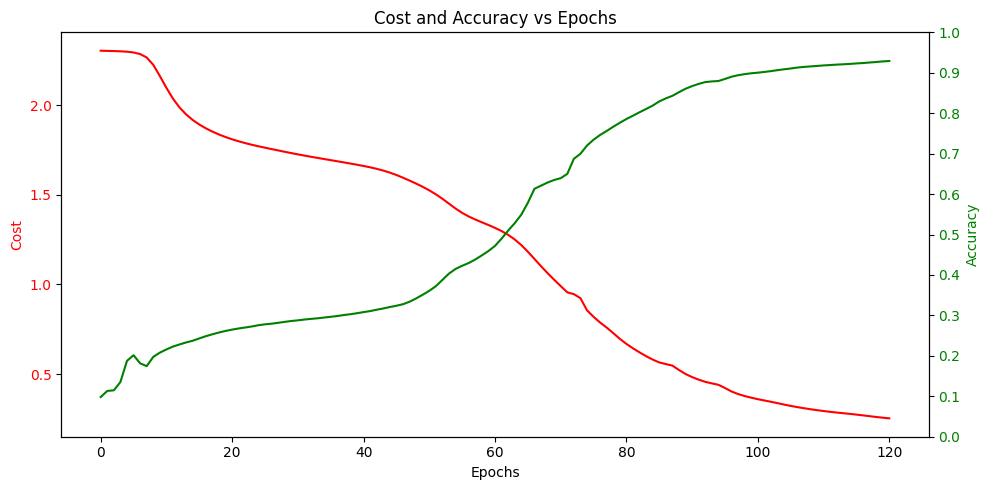

In [16]:
plot_metrics(cost_list,accuracy_list)

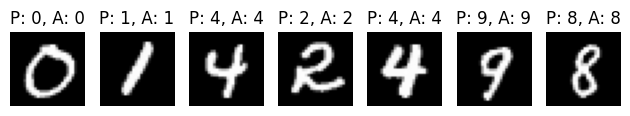

In [17]:
show_predictions(X_train,Y_train,W1, B1, W2, B2, W3, B3, num=7)

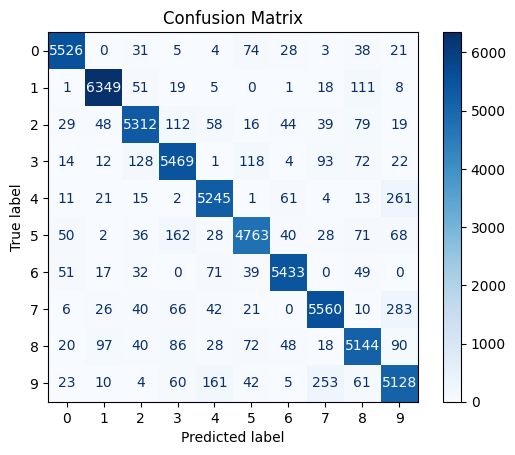

In [22]:
plot_confusion_matrix(X_train,Y_train,W1, B1, W2, B2, W3, B3,title="Confusion Matrix", cmap='Blues')